In [2]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt
import numpy as np

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## First we want to recreate figures 8.1, 8.2, and 8.3 from the text

In [3]:
# Collect data for star masses: 1.65, 2, 3, 5, 7, 9
a=ms.star_log(mass=1.65,Z=0.02)
b=ms.star_log(mass=2,Z=0.02)
c=ms.star_log(mass=3,Z=0.02)
d=ms.star_log(mass=5,Z=0.02)
e=ms.star_log(mass=7,Z=0.02)
f=ms.star_log(mass=10,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 1.65
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 5.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 7.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 12.0
Using old star.logsa file ...
 reading ...100% 



We want to draw lines where Radius is constant. We can relate Radius to Temperature and Luminosity using:
$L \sim R^2 T^4$

Let's set some values for R, say R = 0.1$R_{\odot}$, 1$R_{\odot}$ , 5$R_{\odot}$ , 10$R_{\odot}$ , and plot L in terms of T and this R. 

We are given L in terms of $log(\frac{L}{L_{\odot}})$, and T in terms of $log(\frac{T}{T_{\odot}})$. We need to consider this when plotting. If we take the Log of each part of the function, we get
$log(L/L_{\odot}) = log(constant^2 \times \frac{T^4}{T_{\odot}^{4}})$.

So we need to input T in terms of $\frac{T}{T_{\odot}}$.

In [4]:
#Define a function for constant R
def constR(r,t):
    return 2*np.log(r)+4*t
#Set some range of T to run it on
Tex = np.arange(0.01,7,0.01)
tex = np.asarray(Tex)
#print tex

In [5]:
aT = a.get('log_Teff')
bT = b.get('log_Teff')
cT = c.get('log_Teff')
dT = d.get('log_Teff')
eT = e.get('log_Teff')
fT = f.get('log_Teff')
aL = a.get('log_L')
bL = b.get('log_L')
cL = c.get('log_L')
dL = d.get('log_L')
eL = e.get('log_L')
fL = f.get('log_L')
L1 = constR(0.0005,tex)
L2 = constR(0.001,tex)
L3 = constR(0.002,tex)
L4 = constR(0.005,tex)
L5 = constR(0.01,tex)
L6 = constR(0.1,tex)
L7 = constR(1,tex)

<IPython.core.display.Javascript object>


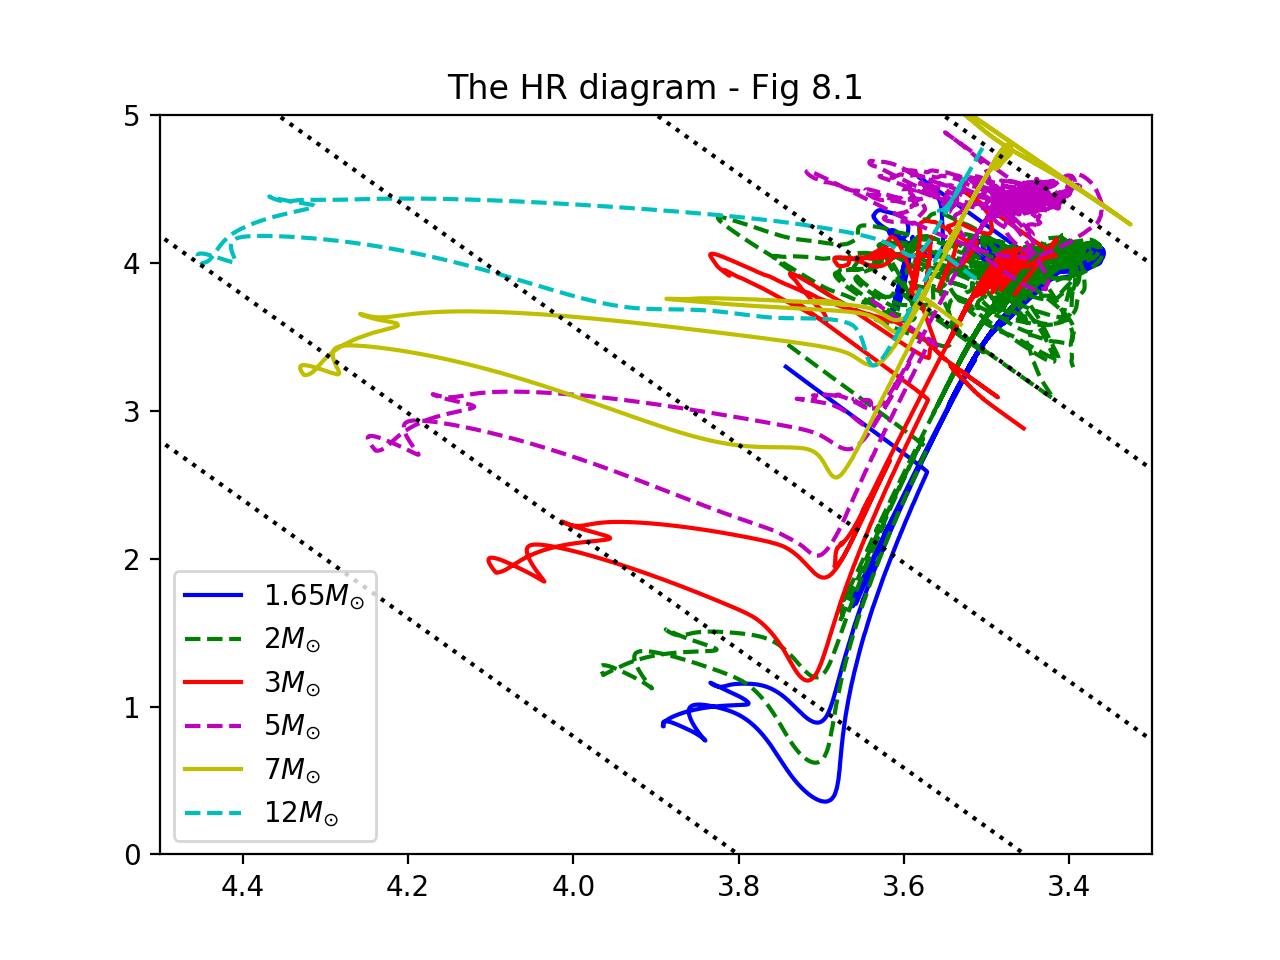

In [6]:
ifig=110;close(ifig);figure(ifig)
#a.hrd_new(skip=100)
# b.hrd_new(skip=100)
# c.hrd_new(skip=100)
# d.hrd_new(skip=100)
# e.hrd_new(skip=100)
plt.plot(aT, aL, 'b-', label="1.65$M_{\odot}$")
plt.plot(bT, bL, 'g--',label="2$M_{\odot}$")
plt.plot(cT, cL, 'r-',label="3$M_{\odot}$")
plt.plot(dT, dL, 'm--',label="5$M_{\odot}$")
plt.plot(eT, eL, 'y-',label="7$M_{\odot}$")
plt.plot(fT, fL, 'c--',label="12$M_{\odot}$")
plt.plot(tex, L1, 'k:')
plt.plot(tex, L2, 'k:')
plt.plot(tex, L3, 'k:')
plt.plot(tex, L4, 'k:')
plt.plot(tex, L5, 'k:')
plt.plot(tex, L6, 'k:')
plt.plot(tex, L7, 'k:')
plt.gca().invert_xaxis()
plt.ylim(0,5)
plt.xlim(4.5,3.3)
plt.title('The HR diagram - Fig 8.1')
plt.legend()

In [7]:
#a.plot?

<IPython.core.display.Javascript object>


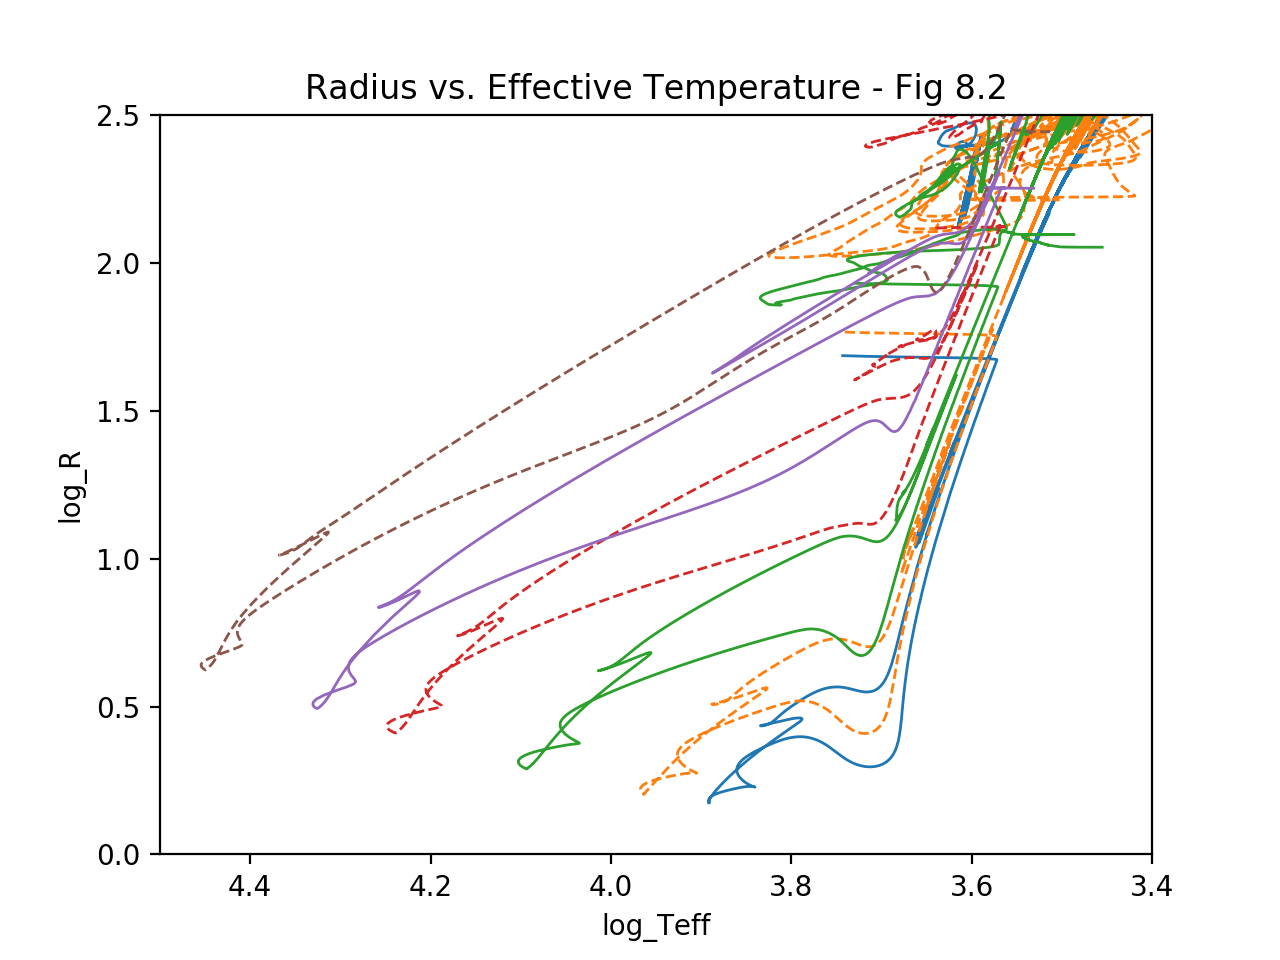

In [8]:
ifig=111;close(ifig);figure(ifig)
a.plot('log_Teff','log_R',shape='-',markevery=100, legend='1.65 $M_{\bigodot}$',limits=[3.4,4.5,0,2.5])
b.plot('log_Teff','log_R',shape='--',markevery=10, legend='2 $M_{\bigodot}$',limits=[3.4,4.5,0,2.5])
c.plot('log_Teff','log_R',shape='-',markevery=100, legend='3 $M_{\bigodot}$',limits=[3.4,4.5,0,2.5])
d.plot('log_Teff','log_R',shape='--',markevery=10, legend='5 $M_{\bigodot}$',limits=[3.4,4.5,0,2.5])
e.plot('log_Teff','log_R',shape='-',markevery=100, legend='7 $M_{\bigodot}$',limits=[3.4,4.5,0,2.5])
f.plot('log_Teff','log_R',shape='--',markevery=10, legend='12 $M_{\bigodot}$',limits=[3.4,4.5,0,2.5])
gca().invert_xaxis()
title('Radius vs. Effective Temperature - Fig 8.2')
#legend()
#legend('1.65 $M_{\bigodot}$','2 $M_{\bigodot}$','3 $M_{\bigodot}$','5 $M_{\bigodot}$','7 $M_{\bigodot}$','12 $M_{\bigodot}$')

In [9]:
#a.tcrhoc?

<IPython.core.display.Javascript object>


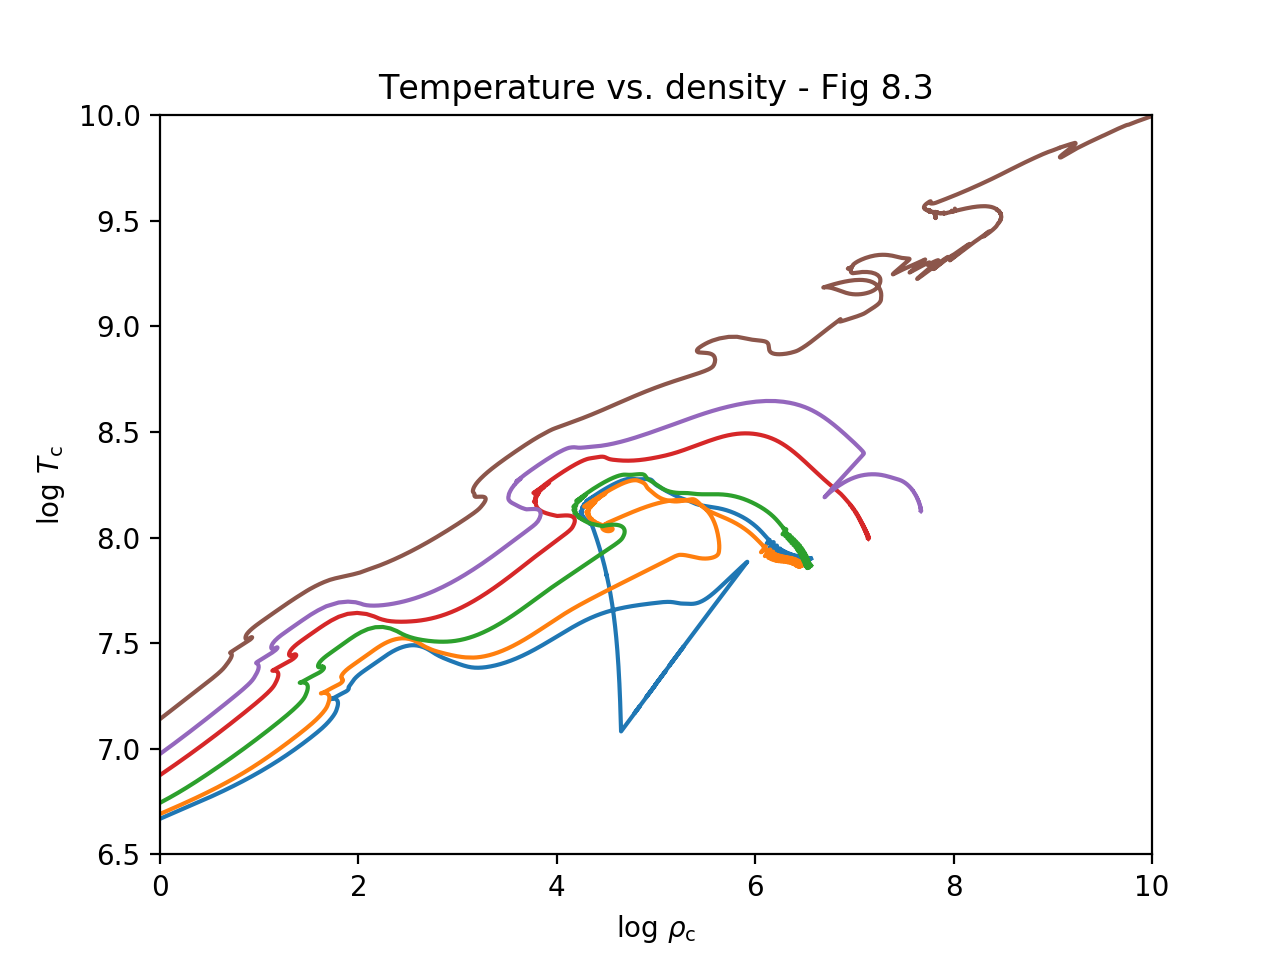

In [10]:
ifig=112;close(ifig);figure(ifig)
a.tcrhoc(label='1.65 $M_{\bigodot}$')
b.tcrhoc(label='2 $M_{\bigodot}$')
c.tcrhoc(label='3 $M_{\bigodot}$')
d.tcrhoc(label='5 $M_{\bigodot}$')
e.tcrhoc(label='7 $M_{\bigodot}$')
f.tcrhoc(label='12 $M_{\bigodot}$')
ylim(6.5,10)
xlim(0,10)
#legend(loc=0).draw_frame(False)
title('Temperature vs. density - Fig 8.3')

In [11]:
bpa = ms.mesa_profile(mass=1.65,Z=0.02,num=1000)
bpb = ms.mesa_profile(mass=2,Z=0.02,num=1000)
bpc = ms.mesa_profile(mass=3,Z=0.02,num=1000)
bpd = ms.mesa_profile(mass=5,Z=0.02,num=1000)
bpe = ms.mesa_profile(mass=7,Z=0.02,num=1000)
bpf = ms.mesa_profile(mass=12,Z=0.02,num=1000)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 1.65
100 in profiles.index file ...
Found and load nearest profile for cycle 5000
reading /data/nugrid_apod2//data/set1ext/set1.2/see_wind/M1.65Z2.0e-02/LOGS/log53.data ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
100 in profiles.index file ...
Found and load nearest profile for cycle 1000
reading /data/nugrid_apod2//data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/LOGS/log12.data ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
100 in profiles.index file ...
Found and load nearest profile for cycle 66000
reading /data/nugrid_apod2//data/set1ext/set1.2/see_wind/M3.00Z2.0e-02/LOGS/log100.data ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 5.0
100 in profiles.index file ...
Found and load nearest profile for cycle 43000
reading /d

## 2.Which stellar masses have convective cores on the main sequence,and which do not?
Convective cores occur when the radiative gradient in the core dominates.

<IPython.core.display.Javascript object>


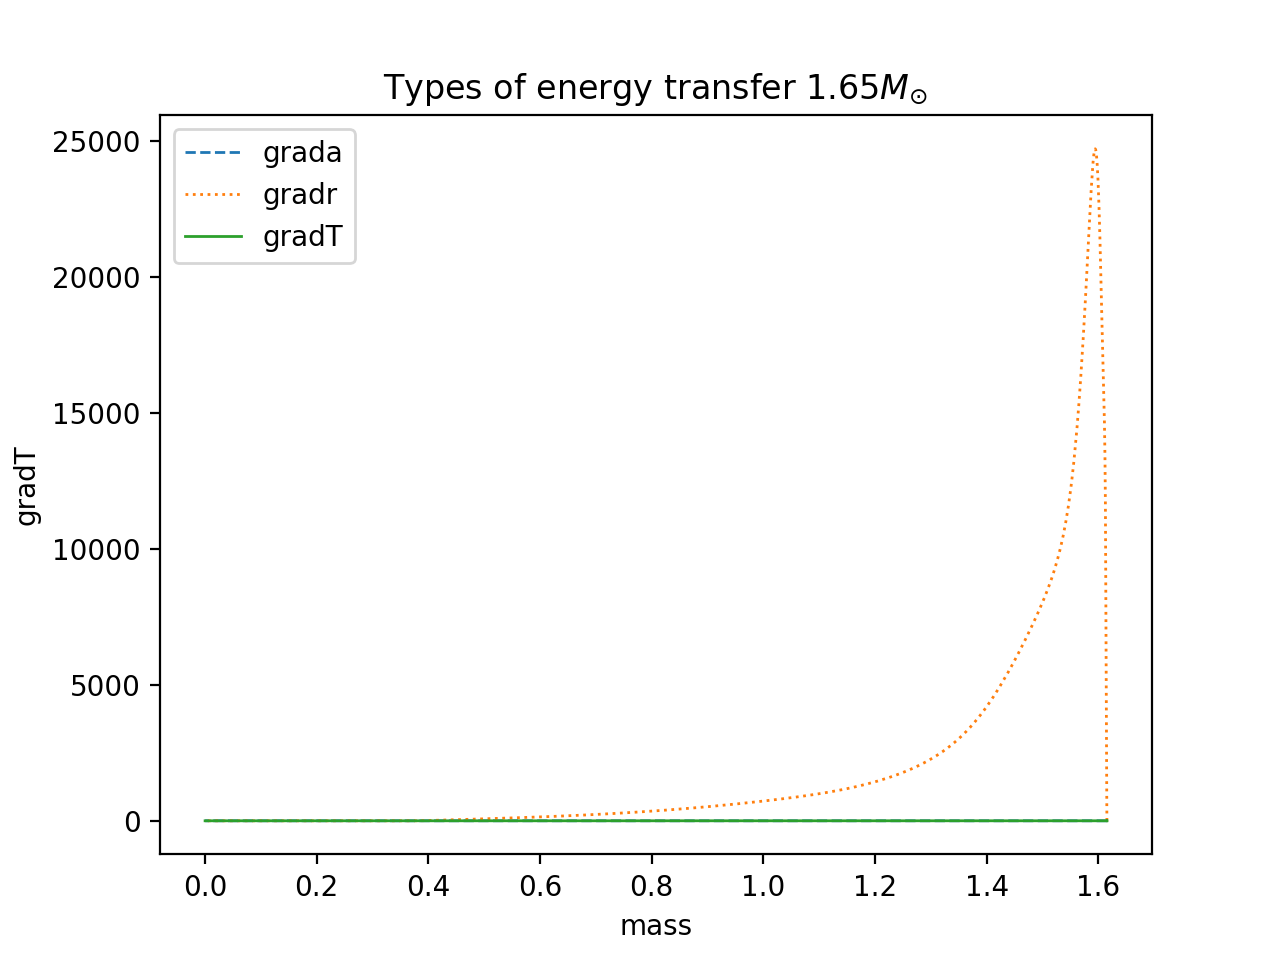

In [12]:
close(127),figure(127)
bpa.plot('mass','grada',shape='--',legend='grada')
bpa.plot('mass','gradr',shape=':',legend='gradr')
bpa.plot('mass','gradT',shape='-',legend='gradT')
title("Types of energy transfer 1.65$M_{\odot}$")

It is clear that there is a convective envelope for this star, but no convective core

<IPython.core.display.Javascript object>


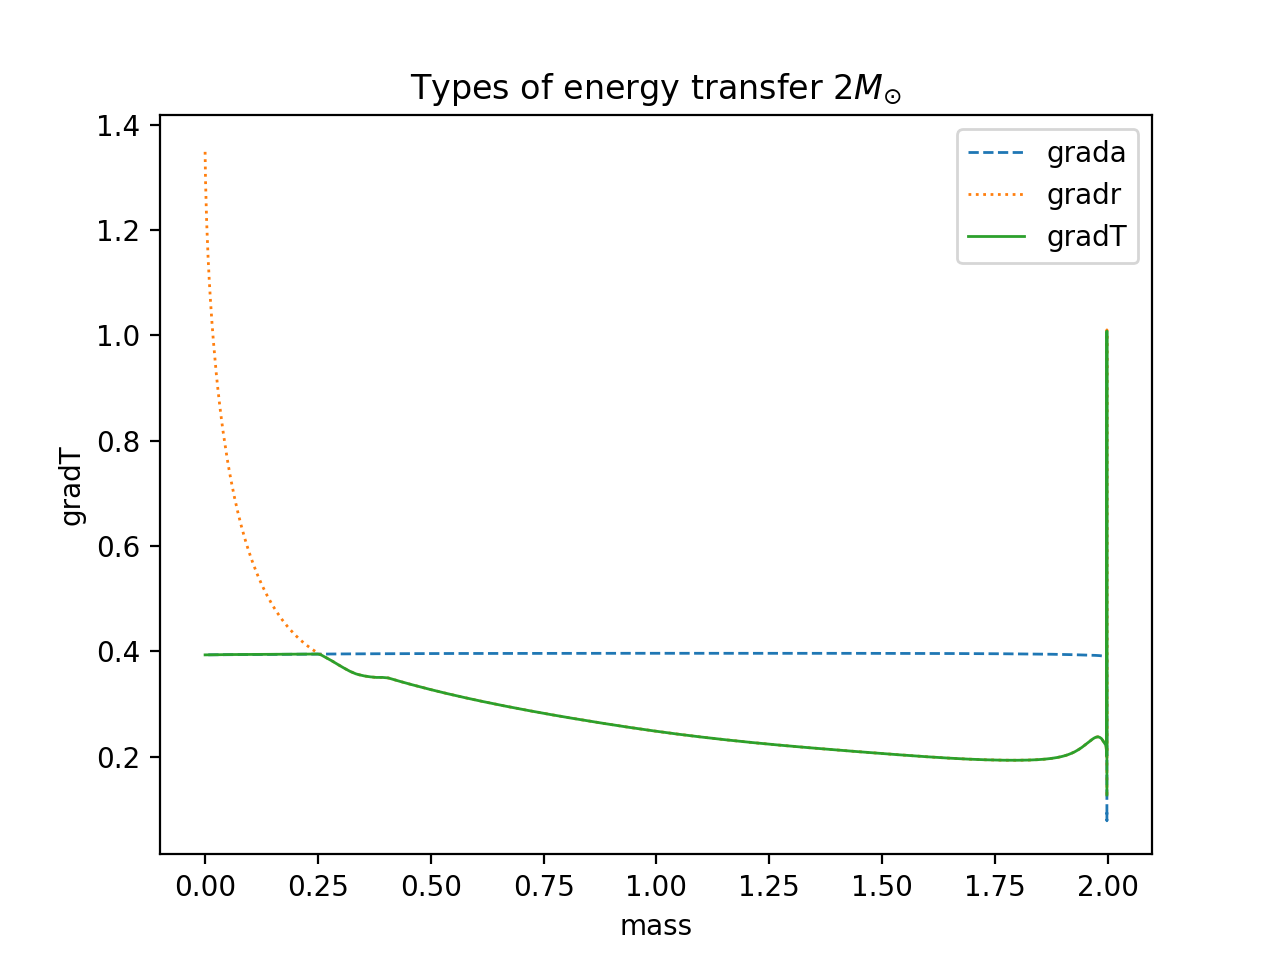

In [13]:
close(128),figure(128)
bpb.plot('mass','grada',shape='--',legend='grada')
bpb.plot('mass','gradr',shape=':',legend='gradr')
bpb.plot('mass','gradT',shape='-',legend='gradT')
title("Types of energy transfer 2$M_{\odot}$")

Convective core, no convective envelope. The convective zone for this is from mass 0 to mass 0.25, where radiative gradient dominates.
smaller T gradient, more effective energy transport

If you zoom in to 0.11-0.18 you can see how the temperature and adiabatic gradients differ. Small temperature excess

<IPython.core.display.Javascript object>


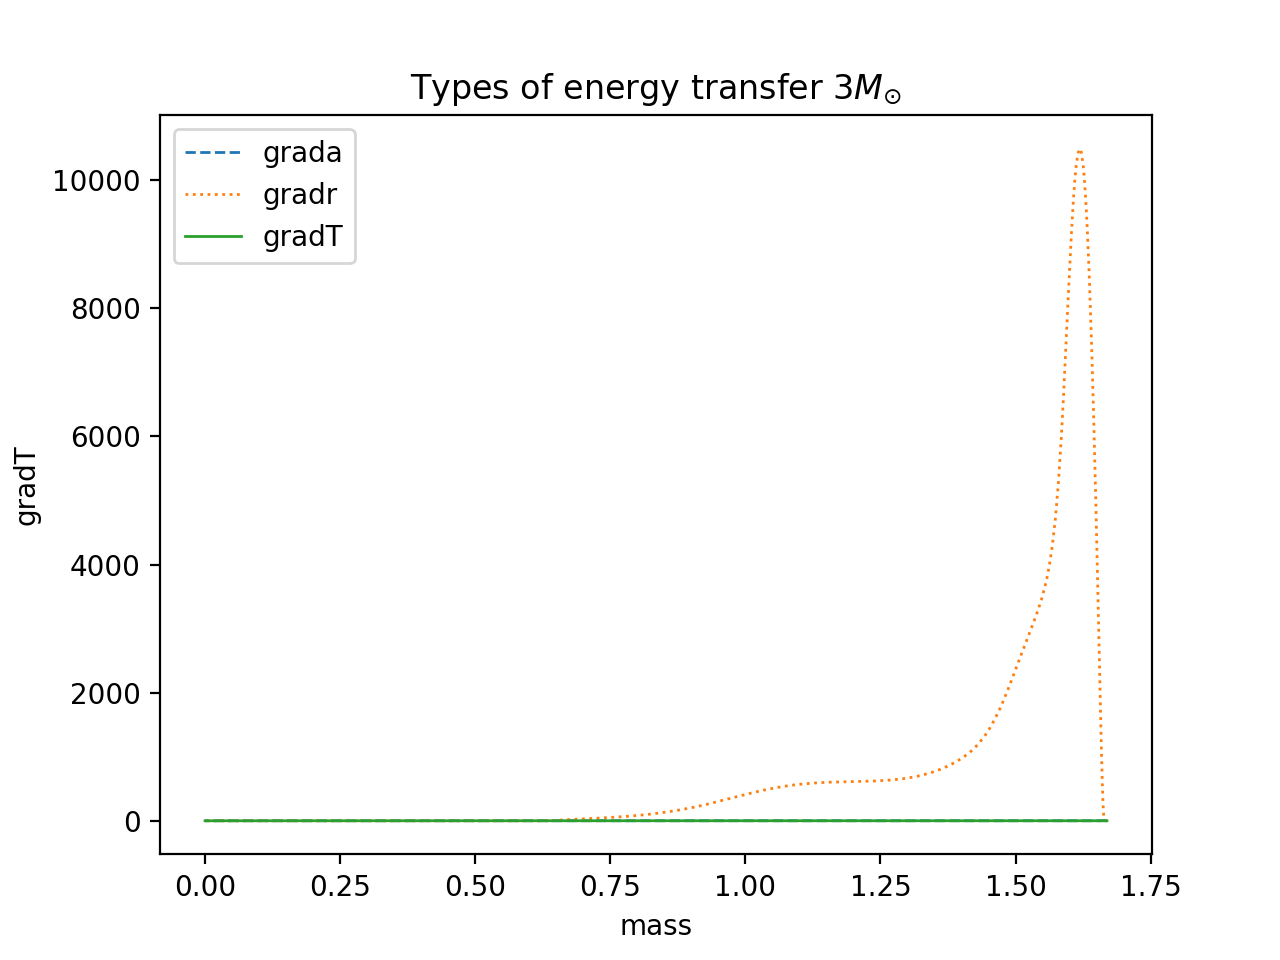

In [14]:
close(129),figure(129)
bpc.plot('mass','grada',shape='--',legend='grada')
bpc.plot('mass','gradr',shape=':',legend='gradr')
bpc.plot('mass','gradT',shape='-',legend='gradT')
title("Types of energy transfer 3$M_{\odot}$")

<IPython.core.display.Javascript object>


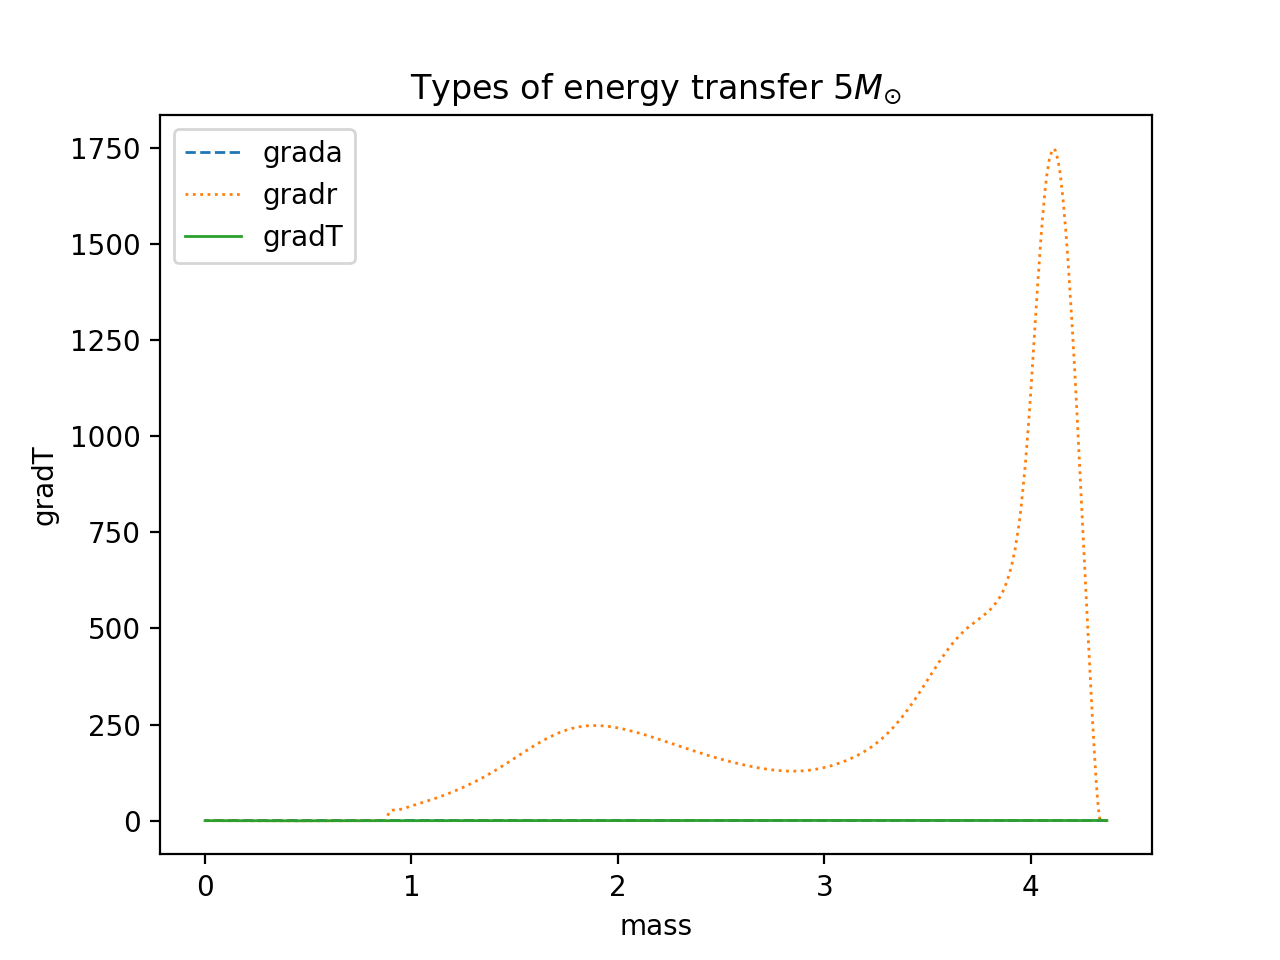

In [15]:
close(130),figure(130)
bpd.plot('mass','grada',shape='--',legend='grada')
bpd.plot('mass','gradr',shape=':',legend='gradr')
bpd.plot('mass','gradT',shape='-',legend='gradT')
title("Types of energy transfer 5$M_{\odot}$")

<IPython.core.display.Javascript object>


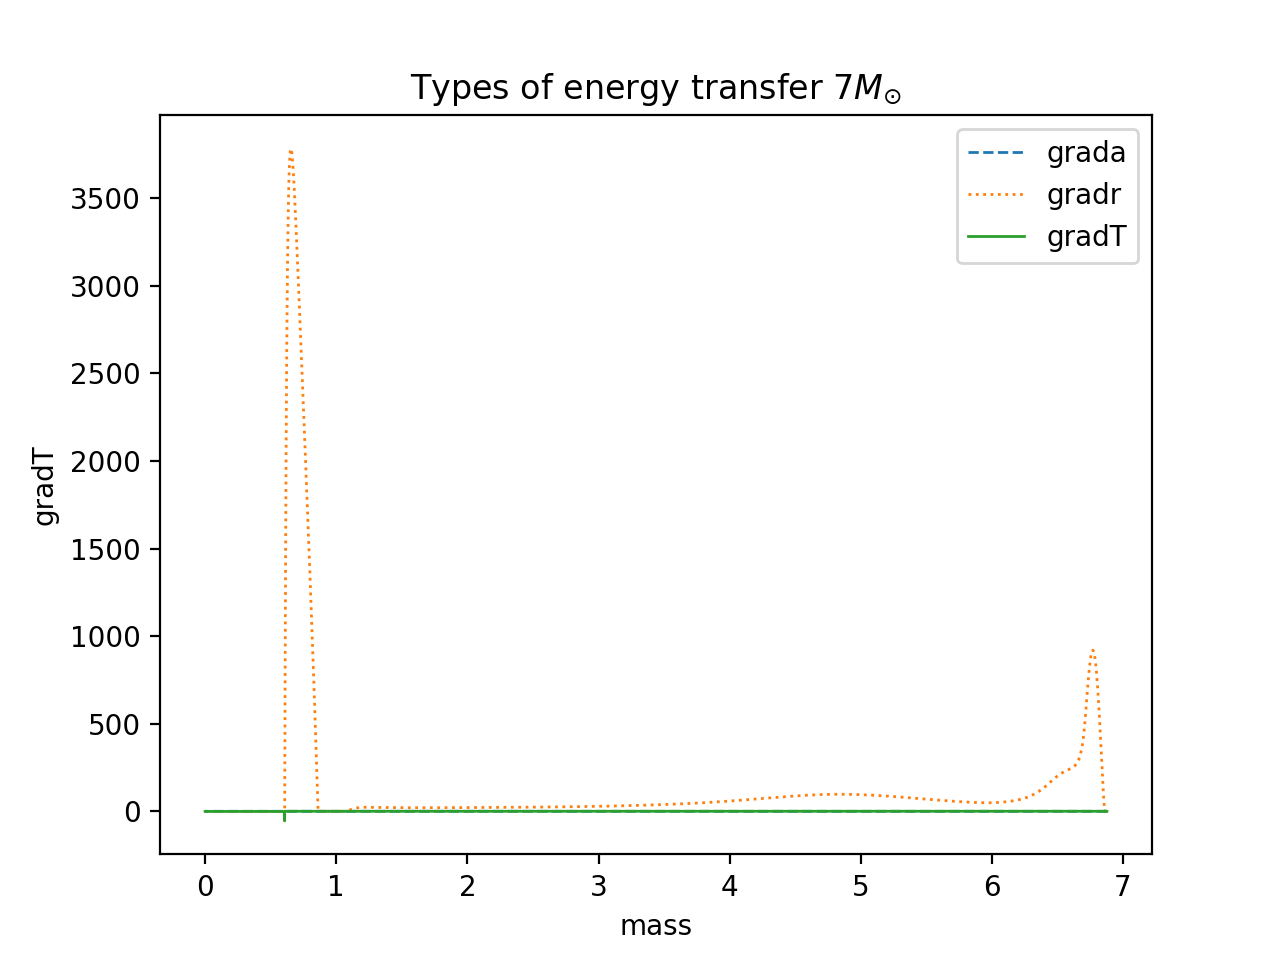

In [16]:
close(131),figure(131)
bpe.plot('mass','grada',shape='--',legend='grada')
bpe.plot('mass','gradr',shape=':',legend='gradr')
bpe.plot('mass','gradT',shape='-',legend='gradT')
title("Types of energy transfer 7$M_{\odot}$")

<IPython.core.display.Javascript object>


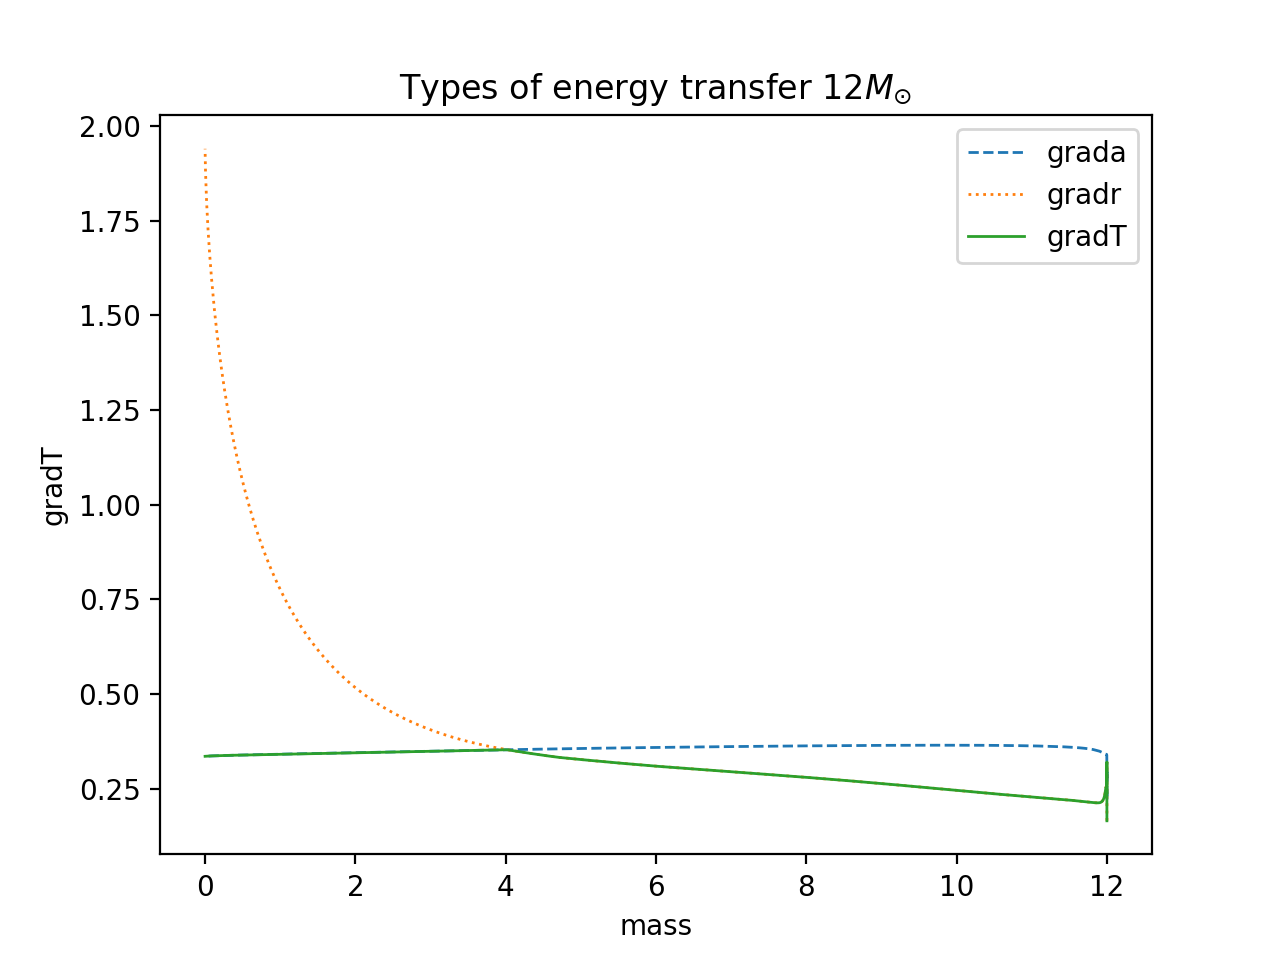

In [17]:
close(132),figure(132)
bpf.plot('mass','grada',shape='--',legend='grada')
bpf.plot('mass','gradr',shape=':',legend='gradr')
bpf.plot('mass','gradT',shape='-',legend='gradT')
title("Types of energy transfer 12$M_{\odot}$")


### From these energy transport graphs, it becomes clear that the $2 M_{\odot}$, $7 M_{\odot}$, and $12 M_{\odot}$ stars all have convective cores

Side note from class:
        Three kinds of energy transport: electron conduction, radiative, and convective
        electron conduction is most effective at core, often rolled into radiative gradient

# Derive the temperature radiative gradient for the stellar interior. Clearly state your assumptions

Let's say there is some vector of flux $j$ on a unit of volume in a star's interior
$j = - D \nabla n$
where $\nabla n$ is the gradient of the photon density and $D$ is the diffusion constant.

We know that the Diffusion Constant $D = \frac{c}{3 v l_{mfp}}$, where $v$ is the velocity of the particles (because we are working with photons, $v=c$) and $l_{mfp}$ is the mean free path. $l_{mfp}=\frac{1}{\rho \kappa}$, the density $g/cm^3$ multiplied by the opacity $cm^2 /g$ assuming the photons are in an optically thick region of the star. We can plug this into our equation for $D$ to get $D = \frac{c}{3 \rho \kappa}$.

$\nabla n$, the gradient of photon density, is directly proportioanl to the change internal energy of the star $\frac{\delta U}{\delta r}$. $U = a T^4$, where a is the scale length at T is the temperature, so $\frac{\delta U}{\delta r} = 4 a T^3 \frac{\delta T}{\delta r}$.

Now that we understand the right side of the equation, we need to understand the left side of the equation. To find the Flux on a unit of volume, we need only look at luminosity.

$L = F 4 \pi r^2$

Now we set the two sides of the equation equation to each other.

$j = - D \nabla n$
becomes
$\frac{L}{4 \pi r^2} = \frac{-c}{3 \rho \kappa} 4 a T^3 \frac{\delta T}{\delta r}$

If we manipulate this equation, we get the radiative temperature gradient for the inside of a star

$\frac{\delta T}{\delta r} = \frac{-3 \rho \kappa L}{16 \pi c a r^2 T^3}$

## Initialise the 12 solar-mass Z=0.02 MESA stellar evolution model

In [18]:
s=ms.star_log(mass=12,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 12.0
Using old star.logsa file ...
 reading ...100% 



#### Let's make an HR diagram for reference

<IPython.core.display.Javascript object>


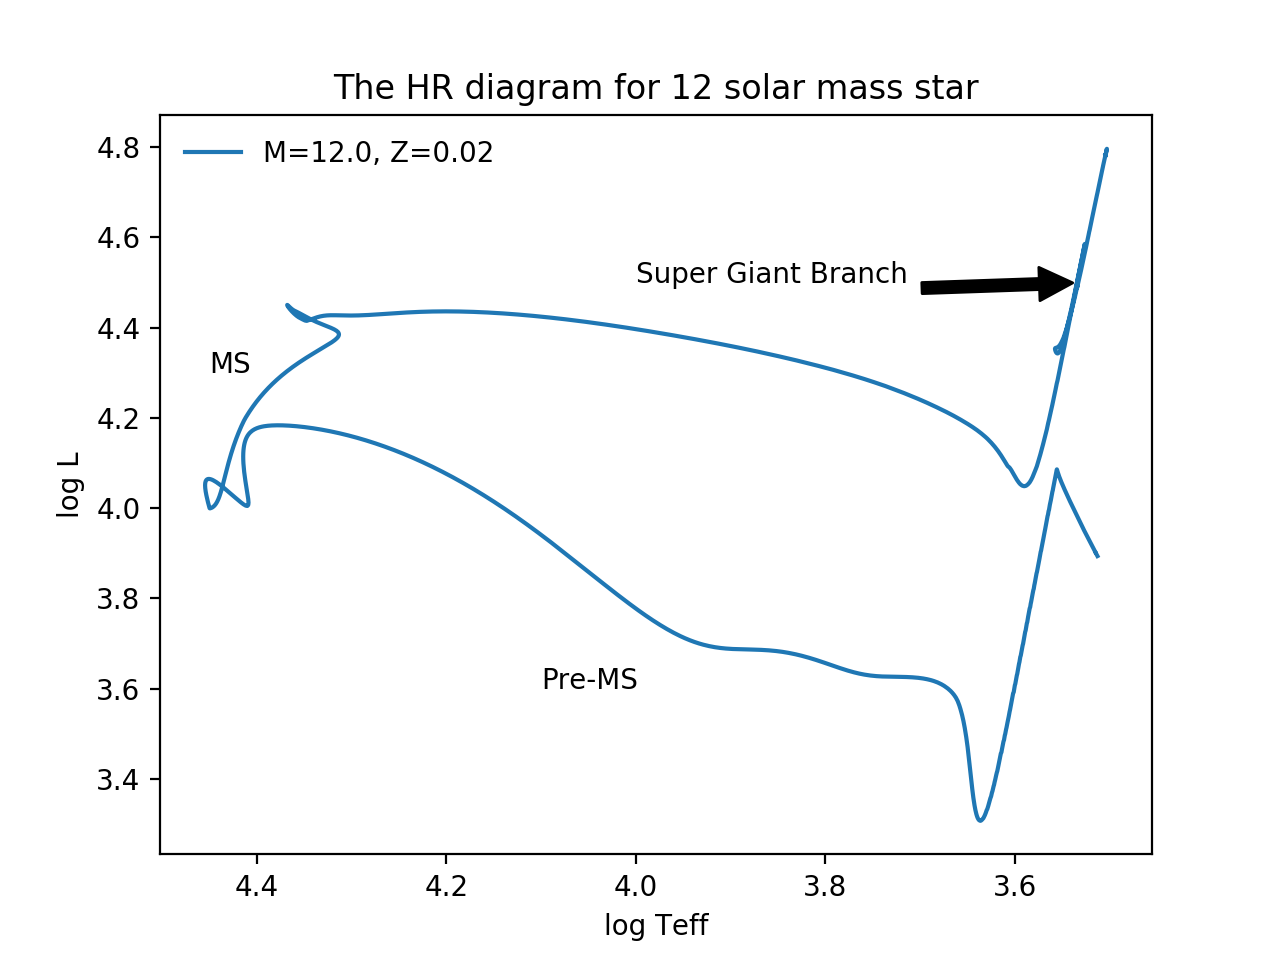

In [19]:
ifig=101;close(ifig);figure(ifig)
s.hrd_new()
legend(loc=0).draw_frame(False)
annotate('Pre-MS', xy=(3.65,3.48), xytext=(4.1, 3.6))
annotate('MS', xy=(3.65,3.48), xytext=(4.45, 4.3))
annotate('Super Giant Branch', xy=(3.53,4.5), xytext=(4.0, 4.5), arrowprops=dict(facecolor='black', shrink=0.05))
#annotate('He-core burning begins', xy=(3.6,3), xytext=(3.5, 2.5), arrowprops=dict(facecolor='black', shrink=0.05))
#annotate('He-core burning dominates', xy=(3.67,2.5), xytext=(4.0, 4.0), arrowprops=dict(facecolor='black', shrink=0.05))
#annotate('RGB', xy=(3.65,2.58), xytext=(3.45, 2.2), arrowprops=dict(facecolor='black', shrink=0.05))
#annotate('main sequence', xy=(4.1,2.55), xytext=(4.0, 3.5), arrowprops=dict(facecolor='black', shrink=0.05))
title('The HR diagram for 12 solar mass star')

<IPython.core.display.Javascript object>


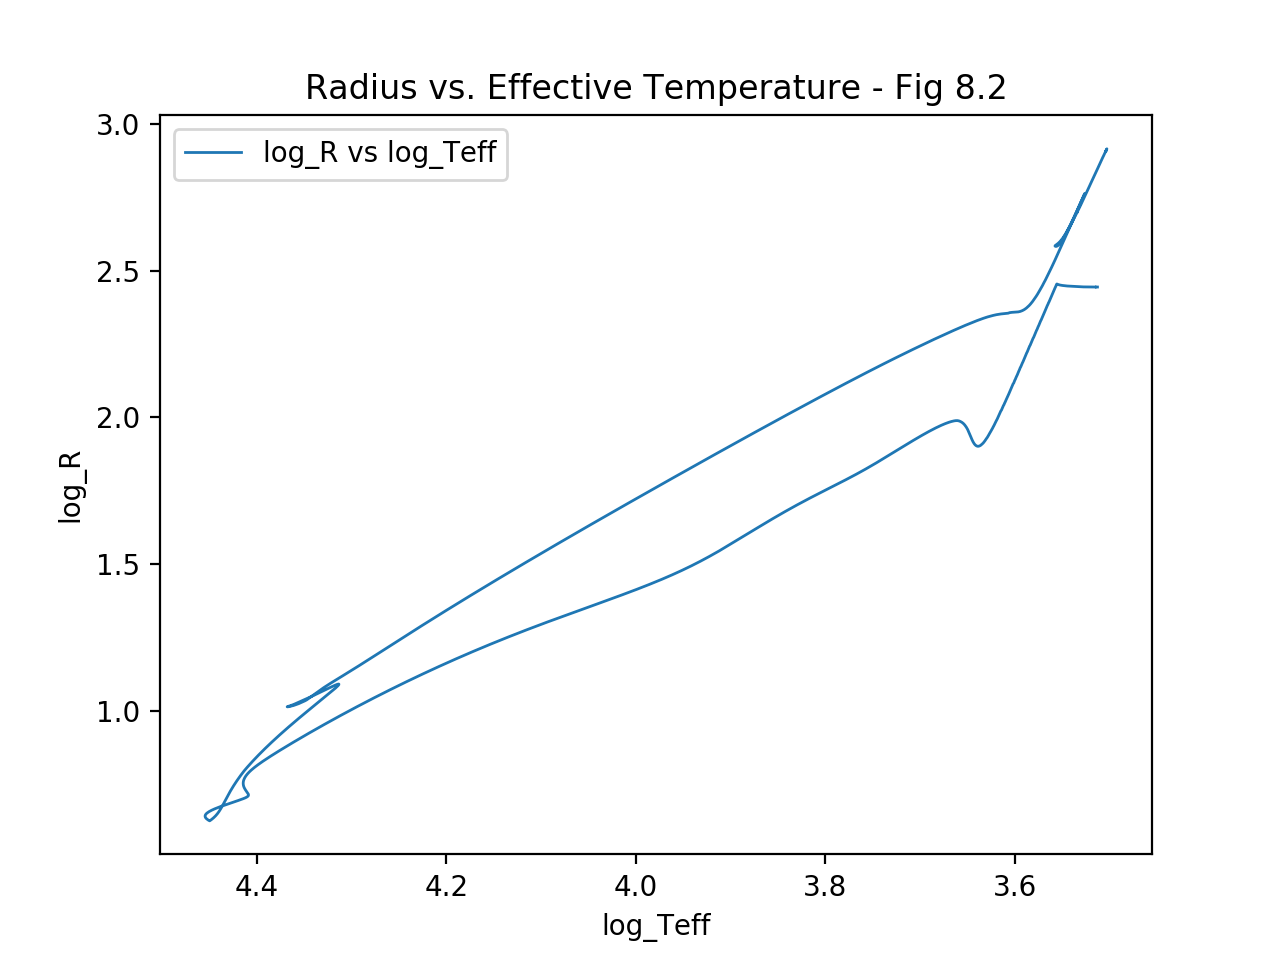

In [20]:
ifig=102;close(ifig);figure(ifig)
s.plot('log_Teff','log_R',shape='-',markevery=1000)
gca().invert_xaxis()
title('Radius vs. Effective Temperature - Fig 8.2')

<IPython.core.display.Javascript object>


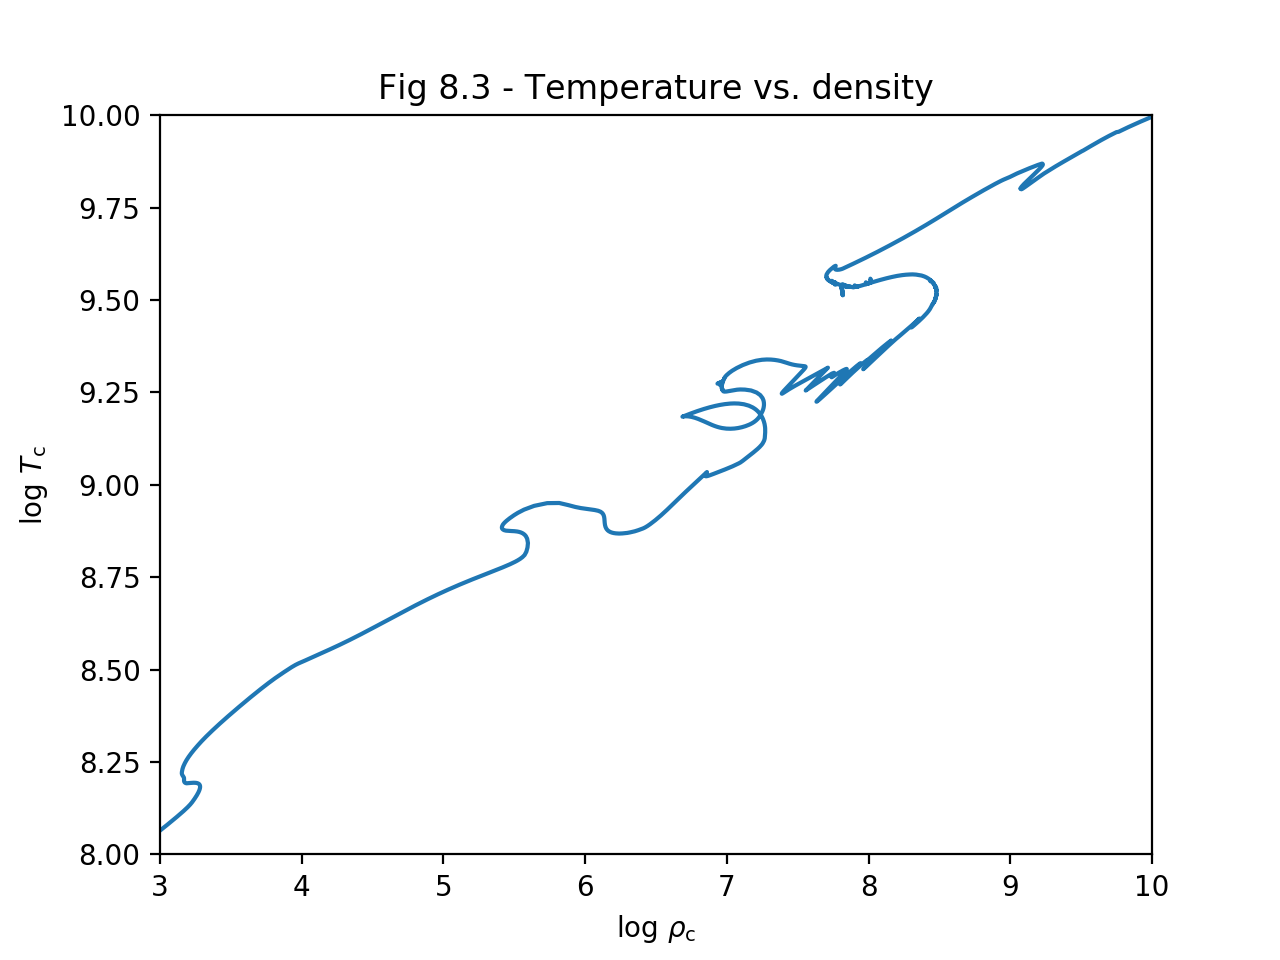

In [21]:
ifig=103;close(ifig);figure(ifig)
s.tcrhoc()
#axis([0,7,7,8.5])
title('Fig 8.3 - Temperature vs. density')

## Now we want to plot the central abundances of H, He, C, O at different stages of burning

#### To accomplish this we need to look at the log_Teff by model number graph, and the HR diagram, to determine at what model number different stages in the star's life occur

In [22]:
pt=mp.se(mass=12,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 12.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


<IPython.core.display.Javascript object>


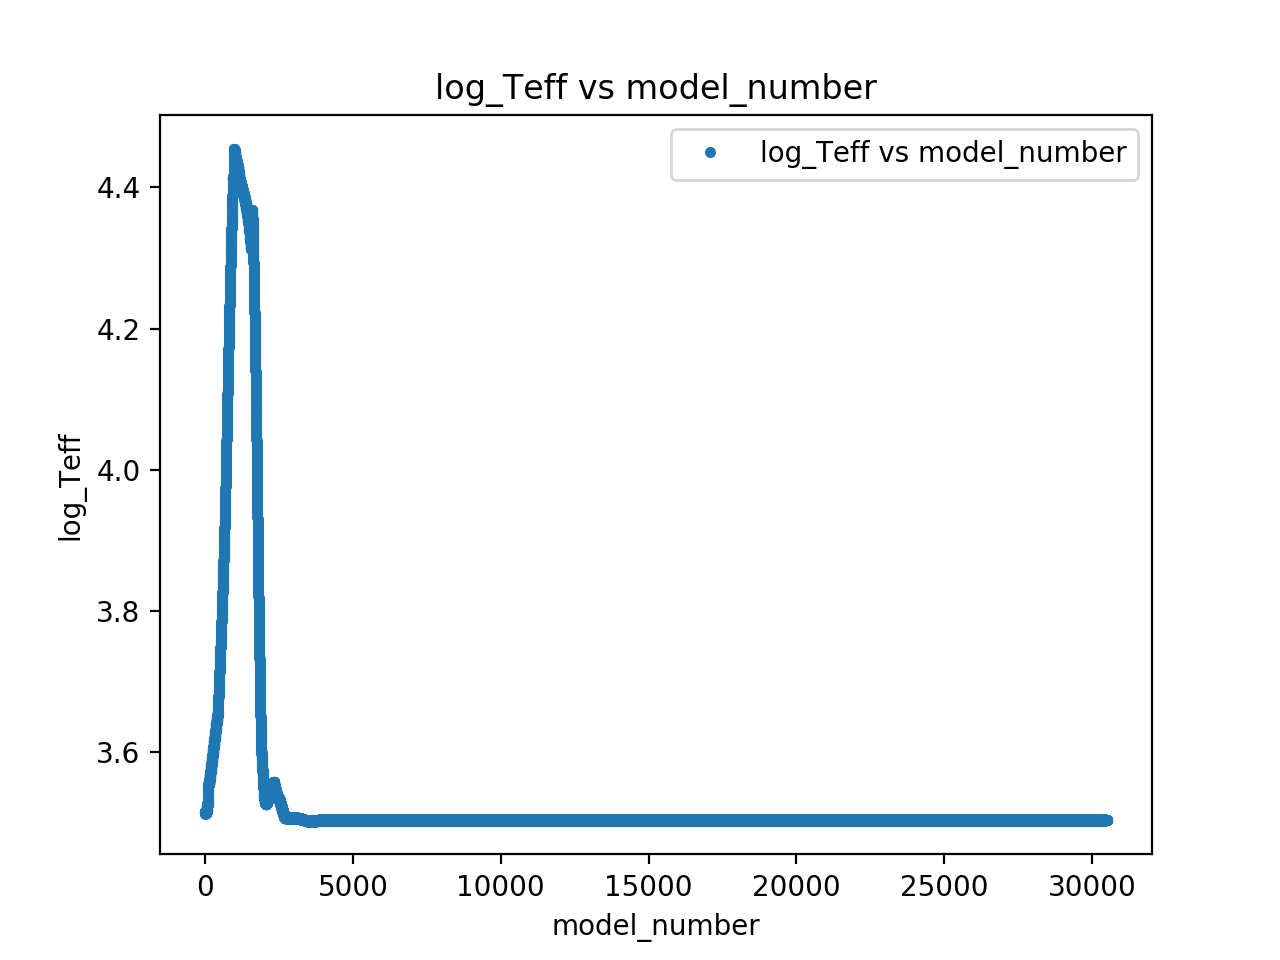

In [23]:
ifig=104;close(ifig);figure(ifig)
s.plot('model_number','log_Teff')

It looks like the star approaches the MS at a model number of 1575, the RGB at 1800

<IPython.core.display.Javascript object>


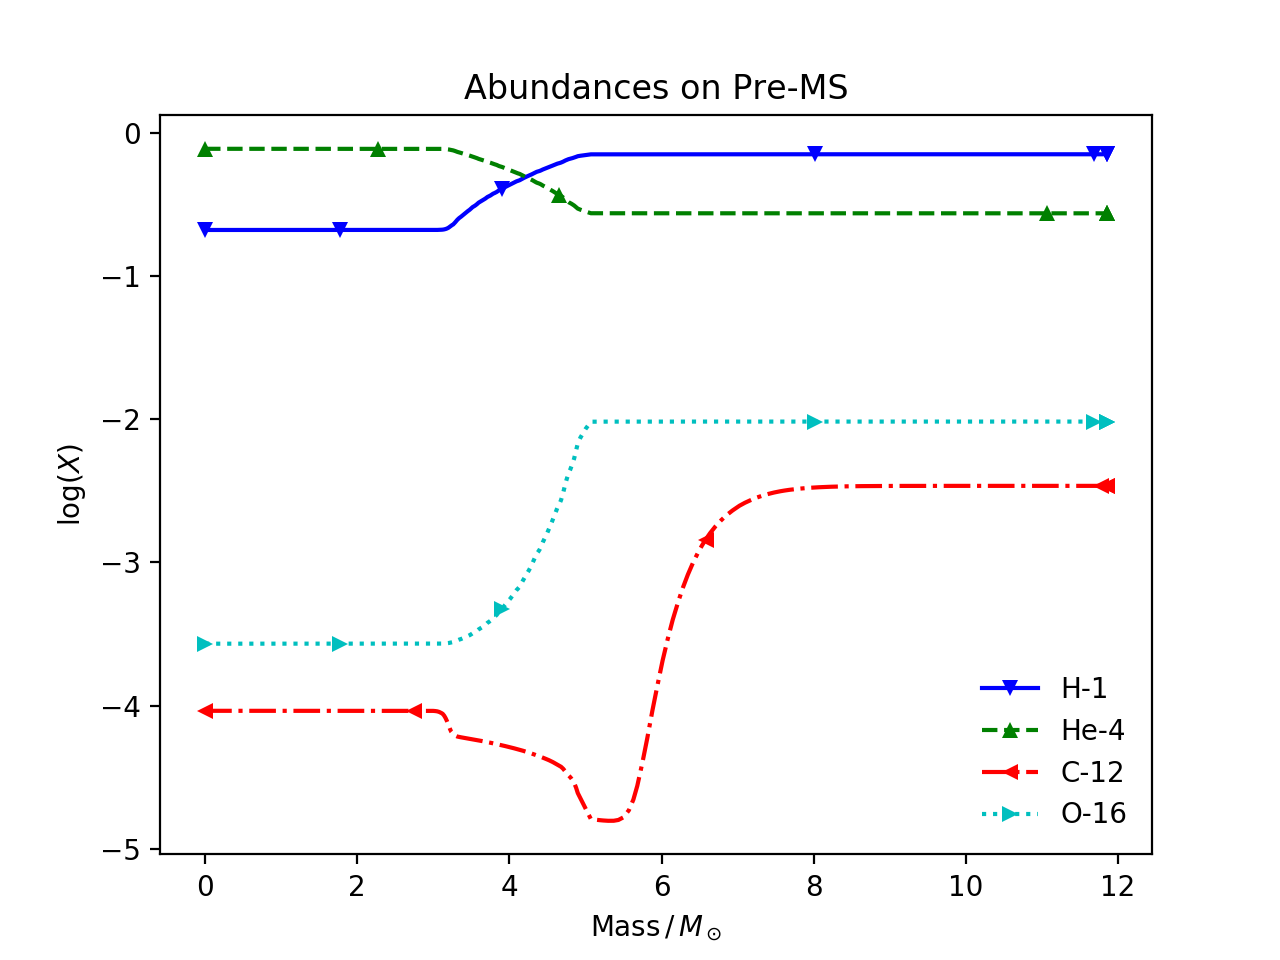

 reading ['iso_massf']...100%

In [24]:
species=['H-1','He-4','C-12','O-16']
ifig=105;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1400, logy=True)
title("Abundances on Pre-MS")

<IPython.core.display.Javascript object>


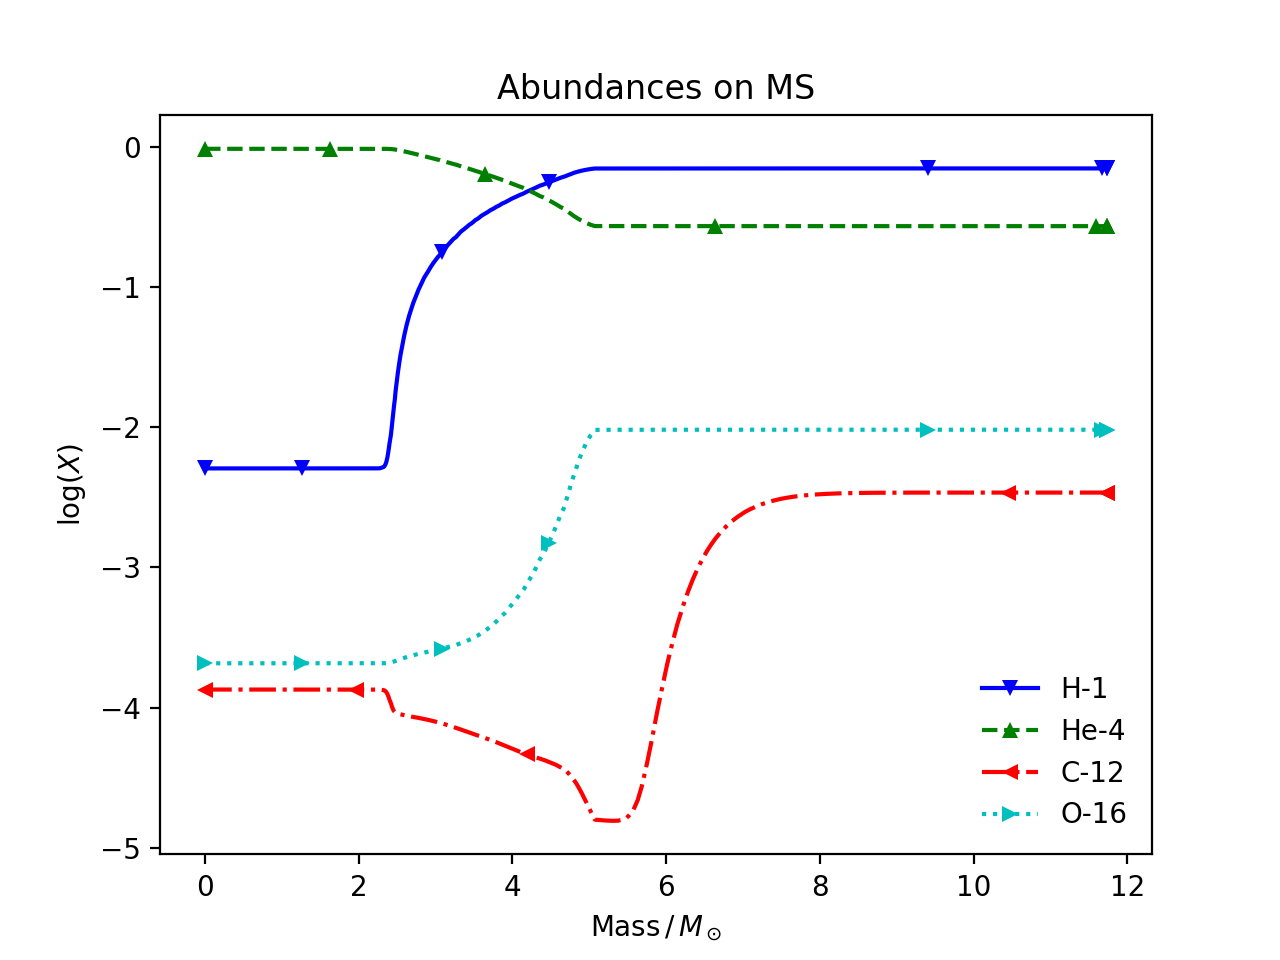

 reading ['iso_massf']...100%

In [25]:
species=['H-1','He-4','C-12','O-16']
ifig=106;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1575, logy=True)
title("Abundances on MS")

<IPython.core.display.Javascript object>


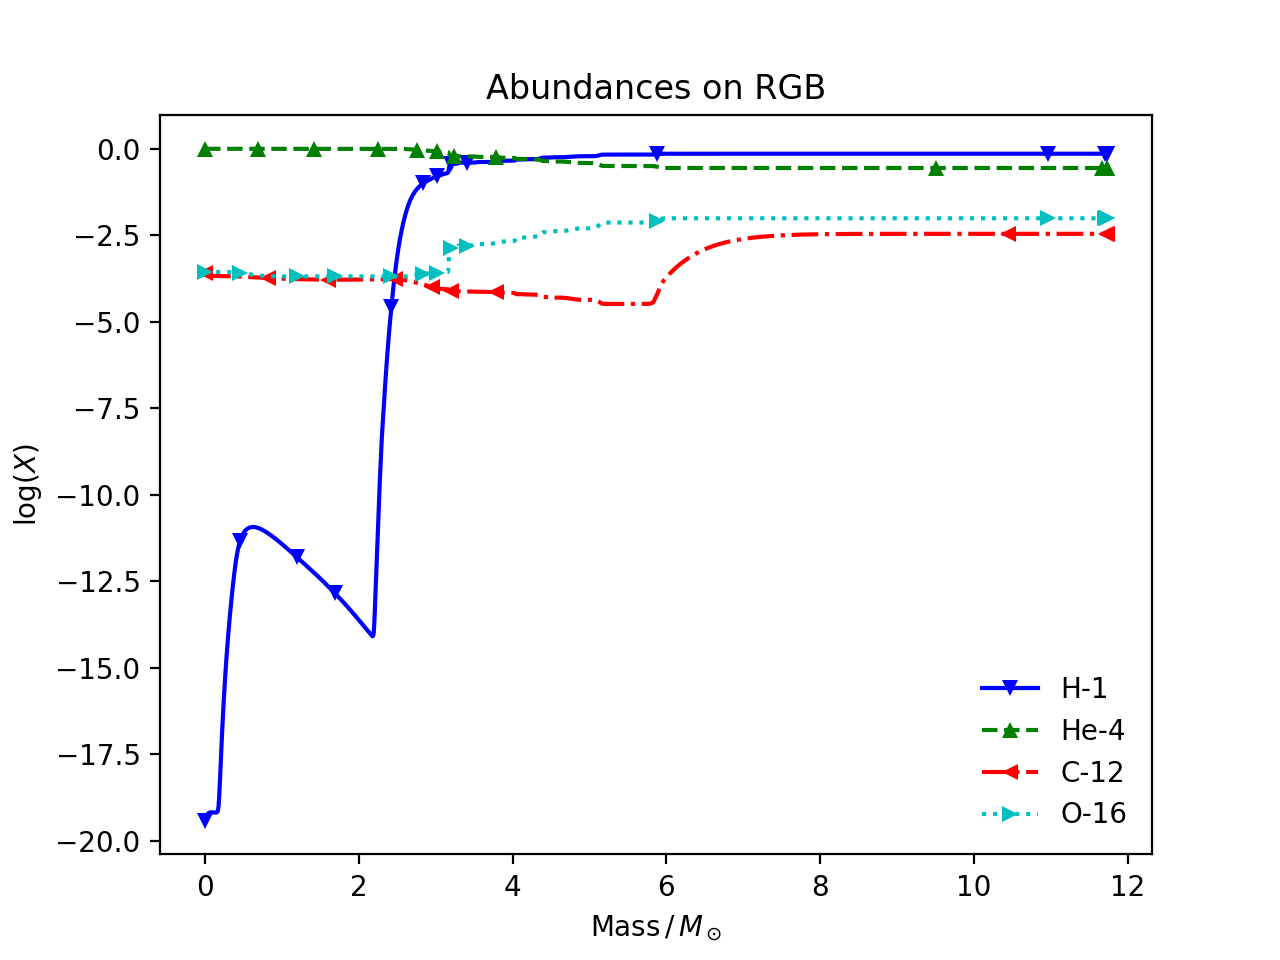

 reading ['iso_massf']...100%

In [26]:
species=['H-1','He-4','C-12','O-16']
ifig=107;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1800, logy=True)
title("Abundances on RGB")

<IPython.core.display.Javascript object>


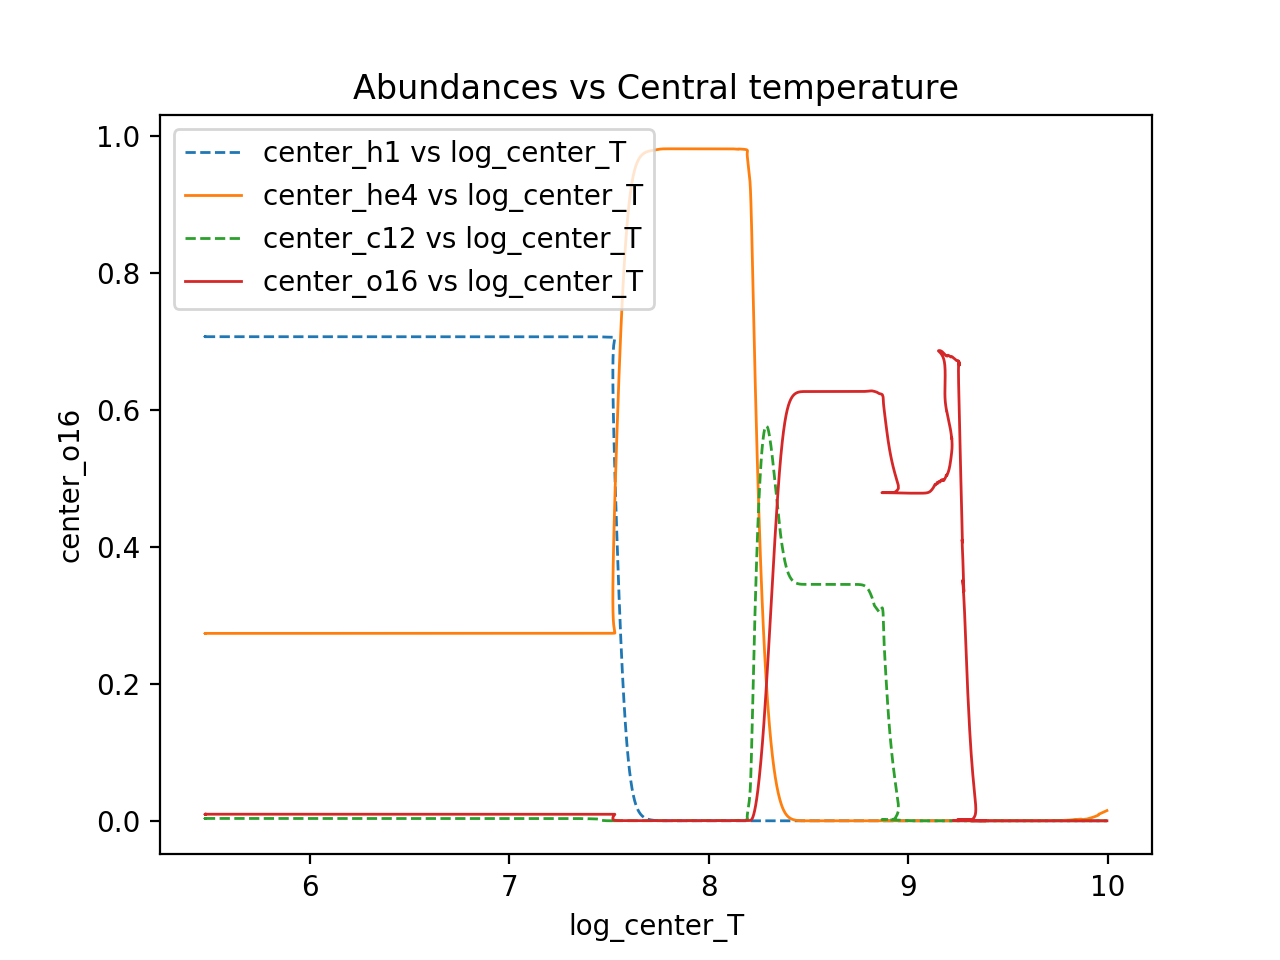

In [27]:
#Now let's plot the rho vs T plot with these abundances

H1 = (s.get('center_h1'))
He4 = (s.get('center_he4'))
C12 = (s.get('center_c12'))
O16 =(s.get('center_o16'))
Tc = (s.get('log_center_T'))
pc = (s.get('log_center_Rho'))

ifig=108;close(ifig);figure(ifig)
s.plot('log_center_T','center_h1',shape='--')
s.plot('log_center_T','center_he4',shape='-')
s.plot('log_center_T','center_c12',shape='--')
s.plot('log_center_T','center_o16',shape='-')
title('Abundances vs Central temperature')

<IPython.core.display.Javascript object>


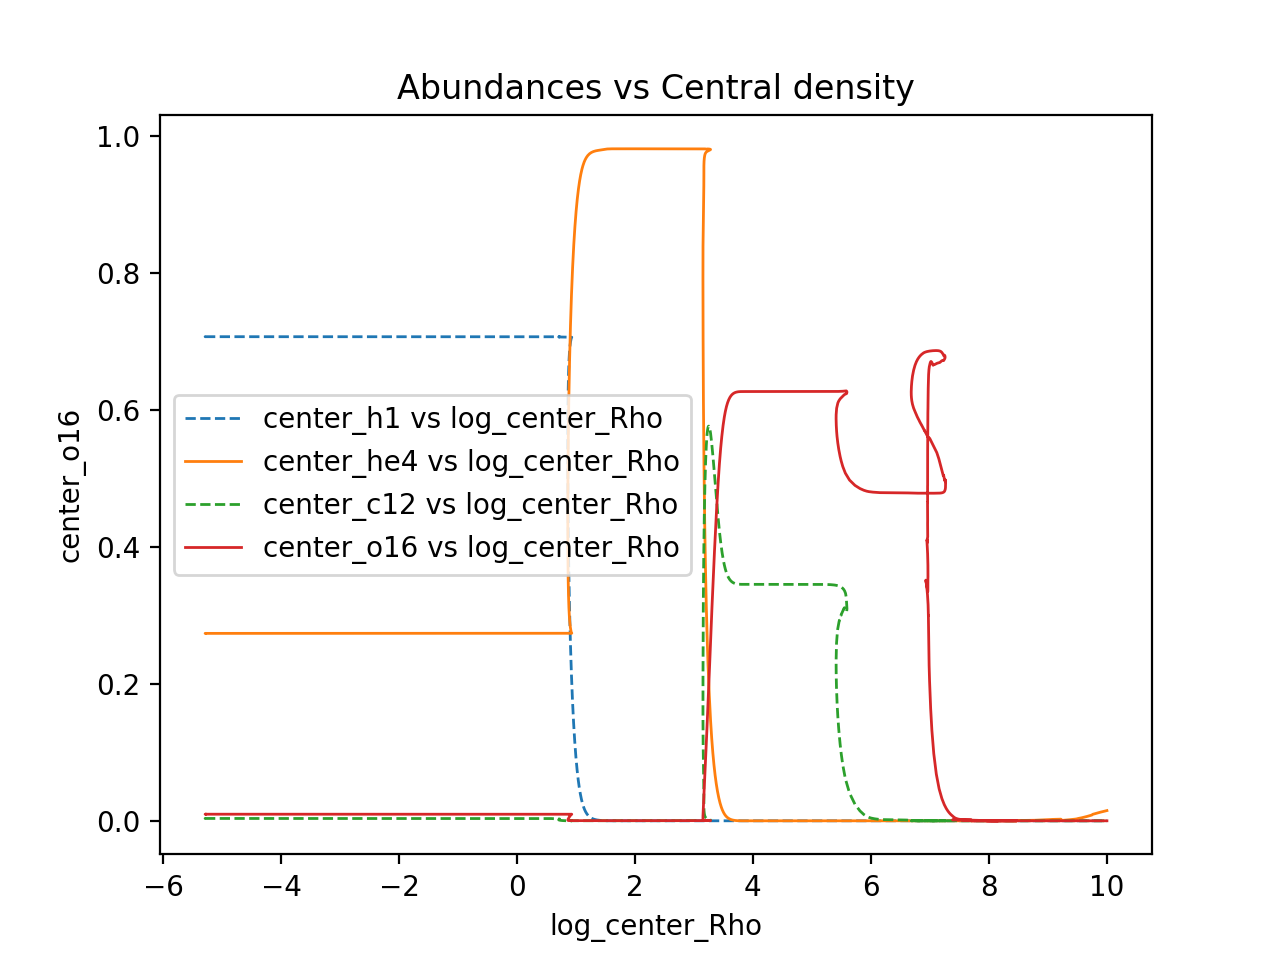

In [28]:
ifig=109;close(ifig);figure(ifig)
s.plot('log_center_Rho','center_h1',shape='--')
s.plot('log_center_Rho','center_he4',shape='-')
s.plot('log_center_Rho','center_c12',shape='--')
s.plot('log_center_Rho','center_o16',shape='-')
title('Abundances vs Central density')

## What are the typical density and temperature conditions for different burning stages?
Based on the above plots, we can assume the typical $log \rho$ and $log T$ for these burning stages are

-H burning: $\rho \sim 0.65$, $T \sim 7.5$

-He burning: $\rho \sim 2.2$, $T \sim 8$

-C burning: $\rho \sim 3.3$, $T \sim 8.3$

-O burning: $\rho \sim 4.5$, $T \sim 8.6$

## Interpulse time and luminosity given, how much mass burned in H-shell burning from one TP to another?

We know that Luminosity is the change in energy over time $\frac{\delta E}{\delta t}$. We can say that $\delta t$ is the interpulse time.
We also know that $E = m c^2$, so $\delta E = \delta m c^2$. Thus the mass burned from on thermal pulse to another is
$\delta m = \frac{L \delta t}{c^2}$

First we must determine how much energy comes from one CNO cycle, let's check wikiepdia!
One CNO reaction energy:  25 MeV = 4e-12 J
Let's convert this to mass of H burned, using $E = m c^2$, where $c = 3 \times 10^8$
So one CNO cycle corresponds to 1.3e-20 kg

One solar mass is 2e30 kg, so one CNO cycle burns

In [29]:
(4*10**(-12))/((3*10**8)^2)

#2e30*1.43e-20

1.3333333244444445e-20

# Let's calculate T_c and P_c through hydrostatic equilibrium and the virial theorem

## Hydrostatic Equilibrium Method
We know that

$\frac{P_{central}}{r} = \frac{\Delta P}{\Delta r} \sim \frac{\delta P}{\delta r}$
and
$\frac{\delta P}{\delta r} = -\rho g$

Thus

$P_{central} = r \rho g = r \rho \frac{G m}{r^2} = \rho \frac{G m}{r}$

Employing the ideal gas law $P = \frac{R \rho T}{\mu}$ we can find $T_{central}$ from $P_{central}$

$T_{central} = \frac{P_{central} \mu}{R \rho}$

Plugging in our value for $P_{central}$ we find that

$T_{central} = \frac{G m \mu}{R r}$

## Virial Theorem Method

The Virial Theorem states

$2T + U = 0$

where T is the internal energy $E = c_v T$, where this T is temperature and $c_v$ is the specific heat at a constant volume. U is the potential energy, defined as $U = \frac{G m^2}{r}$

We can use this formula to solve for T, where

$T_{central} = -\frac{G m^2}{r c_v}$

We can apply the ideal gas law once again, using $T_{central} = \frac{P_{central} \mu}{R \rho}$ to give us

$P_{central} = \frac{T_{central} R \rho}{\mu}$

Give that we know $T_{central}$ we can see that

$P_{central} = \frac{G m^2 R \rho}{r c_v \mu}$

## Let's compare these values to the MESA values. We can look at this by seeing how $T_{central}/P_{central} = \frac{\mu}{R \rho}$

Let's say there is some line that describes a $T_{central}$ vs $P_{central}$ curve., this line as a slope of $\frac{\mu}{R \rho}$ where $\mu$ and R are constants. Given the log nature of these functionsin mesa, we can say that $log T_{central} \sim log (\frac{P_{central}}{\rho}) = log{P_{central}} - log{\rho}$

In [30]:
#'log_center_P': 182,
#'log_center_Rho': 181,
#'log_center_T': 180,

MP = s.get('log_center_P')
MT = s.get('log_center_T')

<IPython.core.display.Javascript object>


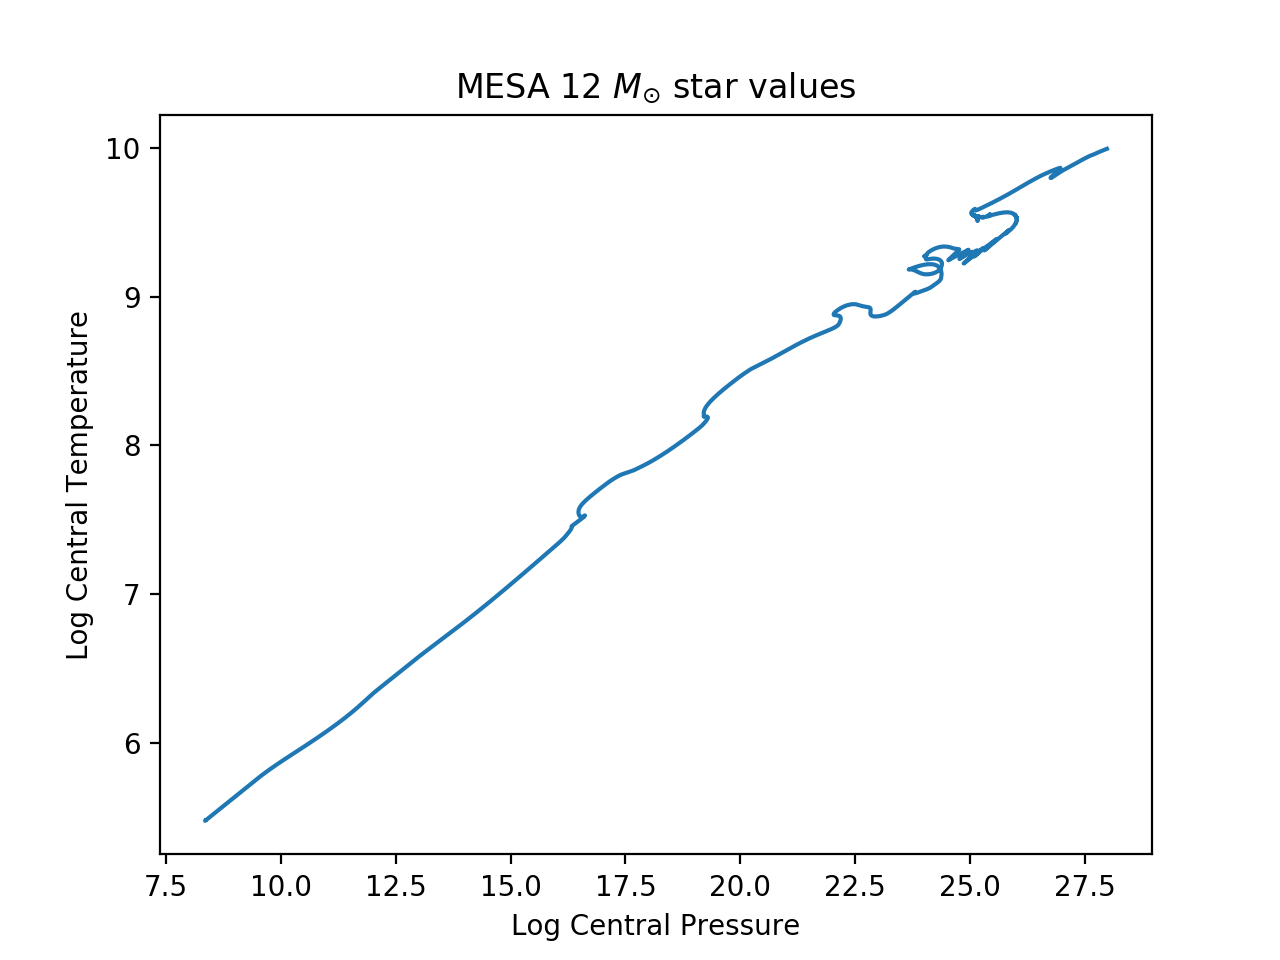

In [31]:
ifig=150;close(ifig);figure(ifig)
plt.plot(MP,MT)
plt.xlabel('Log Central Pressure')
plt.ylabel('Log Central Temperature')
plt.title('MESA 12 $M_{\odot}$ star values')

<IPython.core.display.Javascript object>


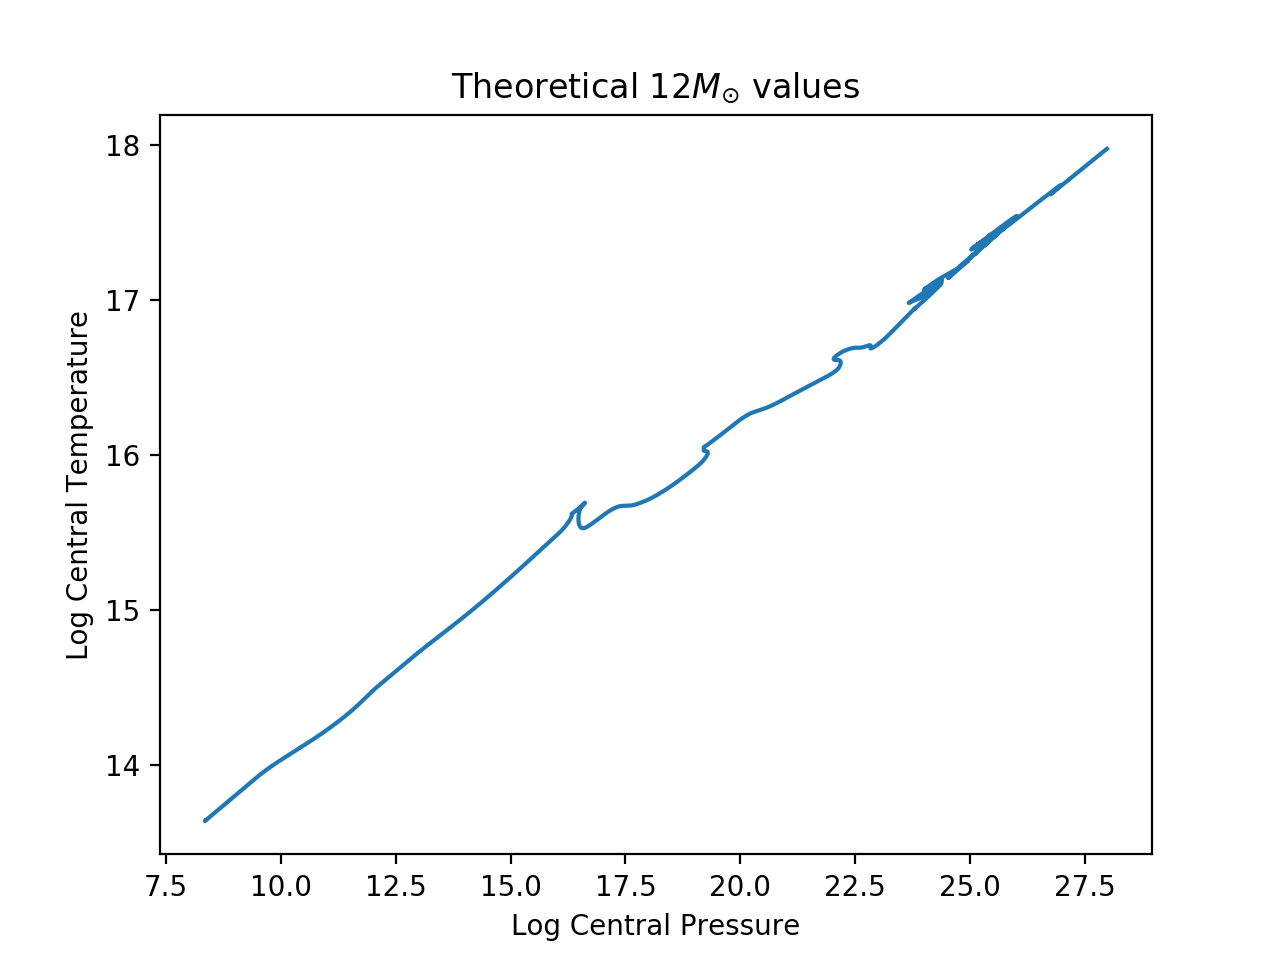

In [32]:
Mrho = s.get('log_center_Rho')
y = MP - Mrho

ifig=151;close(ifig);figure(ifig)
plt.plot(MP,y)
plt.xlabel('Log Central Pressure')
plt.ylabel('Log Central Temperature')
plt.title('Theoretical $12 M_{\odot}$ values')

They seem to behave similarly, both increasing linearly with each other. Though there are small flucutations at high pressure that differ between the MESA model and our theoretical calculation

## Estimate T_central and P_central from M, R for a MS star

For a main sequence star, the mass might be 2e30 kg, with a density of $1 g/cm^3 = 1000 kg/m^3$ , with a radius 700,000 km = 7e8 m. We know $G=6.67408e-11 m^3 kg^-1 s^-2$, R = 8.31 J mol^−1 K^−1 and the mean molecular weight $\mu = 1 g/mol = 0.001 kg/mol$

In [35]:
P = 1000*(6.67408*10**(-11))*(2*10**(30))/(7*10**8)
T = (6.67408*10**(-11))*(2*10**(30))*(0.001)/(8.31*7*10**8)

print "The central Pressure for a MS star is", P, "Pa"
print "The central Temperature for a MS star is", T, "K"

The central Pressure for a MS star is 1.90688e+14 Pa
The central Temperature for a MS star is 22946811.071 K


Notes from class, ignore:

Associate Tc vs rhoc wiggles with abundance shifts

How much mass burned in H shell from on thermal pulse to another?
    -How much energy comes from one CNO cycle: wikipedia mass defect E=mc^2, get E in ergs
        -Find out how many particles that is, use Avagadro number to turn that into mass
    -Should be about 10^-2 solar masses, 10^-7 solar masses per year    